In [ ]:
## Notebook env: brian_script_env (R kernel)
## this notebook remakes some of the figures in the TCGA dataset analysis for better aesthetics

In [1]:
library(ggplot2)
library(ggrepel)
library(ggpubr)
library(sinaplot)
library(ggforce)

Loading required package: plyr


Attaching package: ‘plyr’


The following object is masked from ‘package:ggpubr’:

    mutate




In [2]:
load('/home/ssobti/projects/heterogeneity_brian/output_data/distance_analysis/sample_distances_q25_q75_PCA_2000DEGs.RData')

In [3]:
load('/home/ssobti/projects/heterogeneity_brian/output_data/distance_analysis/sample_distances_q25_q75_UMAP_2000DEGs.RData')

### Remaking z_plot_comparison_filtered_genes_2000DEGs.pdf

In [4]:
## remaking comparison boxplots (z_plot_comparison_filtered_genes_2000DEGs.pdf)
z_df_up_q75 <- read.csv("/home/ssobti/projects/heterogeneity_brian/output_data/z_df_up_q75_2000DEGs.txt", stringsAsFactors=FALSE)

z_df_up_q90 <- read.csv("/home/ssobti/projects/heterogeneity_brian/output_data/z_df_up_q90_2000DEGs.txt", stringsAsFactors=FALSE)

intersected_names <- 
  intersect (z_df_up_q75$Chromatin.factor.name, z_df_up_q90$Chromatin.factor.name)

z_df_up_q90_intersected <- 
  z_df_up_q90[z_df_up_q90$Chromatin.factor.name %in% intersected_names,]

z_df_up_q90_intersected$quartile <- "From analysis using bottom 10% vs top 90%"

z_df_up_q75_intersected <- 
  z_df_up_q75[z_df_up_q75$Chromatin.factor.name %in% intersected_names,]

z_df_up_q75_intersected$quartile <- "From analysis using bottom quartile vs top quartile"

z_comparison_melt <- rbind(z_df_up_q75_intersected, z_df_up_q90_intersected)

z_df_up_q90$quartile_level = 'q10 vs q90'
z_df_up_q75$quartile_level = 'q25 vs q75'

z_comparison_non_intersected = rbind(z_df_up_q75, z_df_up_q90)

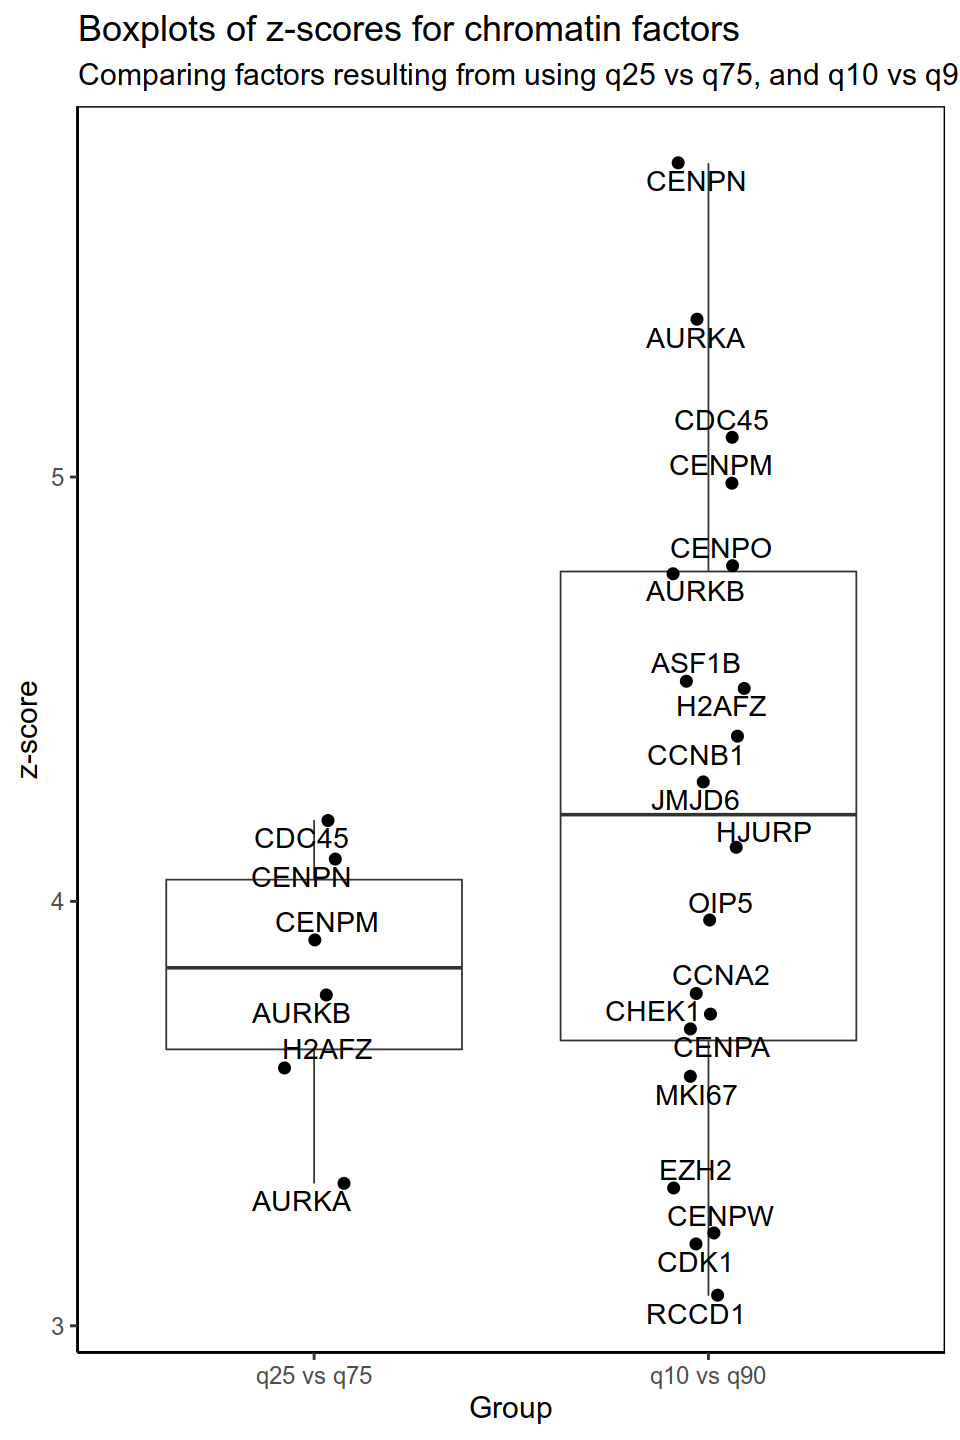

In [5]:
options(repr.plot.width=8, repr.plot.height=12)
z_comparison_non_intersected$quartile_level <- factor(z_comparison_non_intersected$quartile_level, levels = c('q25 vs q75', 'q10 vs q90'))
ggplot(z_comparison_non_intersected, mapping = aes(x = quartile_level, y = Higher_expression_meant_higher_CV)) + 
geom_boxplot() +
geom_jitter(width = 0.1,size = 3) +
  geom_text_repel(data=z_comparison_non_intersected,
            aes(quartile_level,Higher_expression_meant_higher_CV,label=Chromatin.factor.name), size = 6) +
theme_classic(18) + 
labs (title = 'Boxplots of z-scores for chromatin factors', 
        subtitle = 'Comparing factors resulting from using q25 vs q75, and q10 vs q90',
        x = 'Group',
        y = "z-score") + 
theme (legend.position = "none", text=element_text(size=18,  family="Helvetica")) +
theme(panel.background = element_rect(colour = "black"), panel.grid.minor = element_blank())


ggsave(filename = '/home/ssobti/projects/heterogeneity_brian/output_data/z_plot_comparison_filtered_genes_2000DEGs_edited.pdf', width = 8, height = 12)


### Remaking PC space patient data graphs and violin plots

In [6]:
library(tidyr)
library(dplyr)
library(ggplot2)


### import in different type of distances from Khayyam/Norgay server scripts
files <- paste('/home/ssobti/projects/heterogeneity_brian/output_data/distance_analysis/', 
               list.files('/home/ssobti/projects/heterogeneity_brian/output_data/distance_analysis/'), sep = '')
lapply(X = files, FUN = load, .GlobalEnv)

## extract CO and random gene indentity
gene_ident <- unlist(lapply(groupings, '[[', 2))
gene_ident[gene_ident == 'N'] <- 'CO'
gene_ident[gene_ident == 'Y'] <- 'Random'

master_list <- list(cluster_distances_q10_q90 = cluster_distances_q10_q90, cluster_distances_q25_q75 = cluster_distances_q25_q75, cluster_distances_2000DEGs_q10_q90 = cluster_distances_2000DEGs_q10_q90, cluster_distances_2000DEGs_q25_q75 = cluster_distances_2000DEGs_q25_q75, cluster_distances_PCA_2000DEGs_q10_q90 = cluster_distances_PCA_2000DEGs_q10_q90, cluster_distances_PCA_2000DEGs_q25_q75 = cluster_distances_PCA_2000DEGs_q25_q75, cluster_distances_UMAP_2000DEGs_q10_q90 = cluster_distances_UMAP_2000DEGs_q10_q90, cluster_distances_UMAP_2000DEGs_q25_q75 = cluster_distances_UMAP_2000DEGs_q25_q75)
master_list <- lapply(master_list, cbind, gene_ident)

## get mean high/low ratio of the random samplings and divide each of the CO high/low ratio by the random sampling high/low ratio mean
normalizer <- function(x){return(x/max(x))}
for (i in 1:length(master_list)){
  master_list[[i]]$rand_samp_ratio = mean(master_list[[i]]$high_to_low_ratio[master_list[[i]]$gene_ident == 'Random'])
  master_list[[i]]$controlled_ratio = master_list[[i]]$high_to_low_ratio/master_list[[i]]$rand_samp_ratio
  master_list[[i]]$controlled_ratio_norm = normalizer(master_list[[i]]$controlled_ratio)
}


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[[1]]
[1] "groupings"

[[2]]
[1] "cluster_distances_2000DEGs_q10_q90"

[[3]]
[1] "cluster_distances_q10_q90"

[[4]]
[1] "distances_final_q10_q90_PCA"           
[2] "PCA_coordinates_final_q10_q90"         
[3] "grouped_dataframes_list_PCA_q10_q90"   
[4] "cluster_distances_PCA_2000DEGs_q10_q90"

[[5]]
[1] "distances_final_q10_q90_UMAP"           
[2] "UMAP_coordinates_final_q10_q90"         
[3] "grouped_dataframes_list_UMAP_q10_q90"   
[4] "cluster_distances_UMAP_2000DEGs_q10_q90"

[[6]]
[1] "cluster_distances_2000DEGs_q25_q75"

[[7]]
[1] "cluster_distances_q25_q75"

[[8]]
[1] "distances_final_q25_q75_PCA"           
[2] "PCA_coordinates_final_q25_q75"         
[3] "grouped_dataframes_list_PCA_q25_q75"   
[4] "cluster_distances_PCA_2000DEGs_q25_q75"

[[9]]
[1] "distances_final_q25_q75_UMAP"           
[2] "UMAP_coordinates_final_q25_q75"         
[3] "grouped_dataframes_list_UMAP_q25_q75"   
[4] "cluster_distances_UMAP_2000DEGs_q25_q75"

In [7]:
### create a xy graph for the following 3 comparisons PCA vs UMAP dist, 2000 DEG vs PCA dist, All genes vs 2000 DEG dist
DEG_PCA_df_q25_q75 <- data.frame(Genes = master_list[[4]]$COs, Grouped_by = master_list[[4]]$gene_ident, DEG = master_list[[4]]$controlled_ratio_norm, PC = master_list[[6]]$controlled_ratio_norm)

a <- ggplot(DEG_PCA_df_q25_q75, aes(DEG, PC, color = Grouped_by)) + geom_abline(slope = 1, linetype = 3) + geom_point(alpha = 0.5) +
  coord_cartesian(xlim = c(0.2,1), ylim = c(0.2,1)) + theme_minimal() +
  xlab('Top 2000 DEG distance') + ylab('PC space distance') + ggtitle('Mean distance from centroid q25-q75 grouping') +
  ggrepel::geom_text_repel(data=subset(DEG_PCA_df_q25_q75, DEG > 0.6 & PC > 0.8),
                           aes(DEG,PC,label=Genes), box.padding = 0.5, max.overlaps = 15) + scale_color_manual(values = c('blue', 'green'))

DEG_PCA_df_q10_q90 <- data.frame(Genes = master_list[[3]]$COs, Grouped_by = master_list[[3]]$gene_ident, DEG = master_list[[3]]$controlled_ratio_norm, PC = master_list[[5]]$controlled_ratio_norm)
b <- ggplot(DEG_PCA_df_q10_q90, aes(DEG, PC, color = Grouped_by)) + geom_abline(slope = 1, linetype = 3) + geom_point(alpha = 0.5) +
  coord_cartesian(xlim = c(0.2,1), ylim = c(0.2,1)) + theme_minimal() +
  xlab('Top 2000 DEG distance') + ylab('PC space distance') + ggtitle('Mean distance from centroid q10-q90 grouping') +
  ggrepel::geom_text_repel(data=subset(DEG_PCA_df_q10_q90, DEG > 0.5 & PC > 0.7),
                           aes(DEG,PC,label=Genes), box.padding = 0.5, max.overlaps = 15) + scale_color_manual(values = c('blue', 'green'))


All_DEG_df_q25_q75 <- data.frame(Genes = master_list[[4]]$COs, Grouped_by = master_list[[4]]$gene_ident, DEG = master_list[[4]]$controlled_ratio_norm, All = master_list[[2]]$controlled_ratio_norm)

c <- ggplot(All_DEG_df_q25_q75, aes(All, DEG, color = Grouped_by)) + geom_abline(slope = 1, linetype = 3) + geom_point(alpha = 0.5) +
  coord_cartesian(xlim = c(0.25,1), ylim = c(0.25,1)) + theme_minimal() +
  xlab('All genes distance') + ylab('Top 2000 DEG distance') + ggtitle('Mean distance from centroid q25-q75 grouping') +
  ggrepel::geom_text_repel(data=subset(All_DEG_df_q25_q75, DEG > 0.8 & All > 0.8),
                           aes(All,DEG,label=Genes), box.padding = 0.5, max.overlaps = 15) + scale_color_manual(values = c('blue', 'green'))

All_DEG_df_q10_q90 <- data.frame(Genes = master_list[[3]]$COs, Grouped_by = master_list[[3]]$gene_ident, DEG = master_list[[3]]$controlled_ratio_norm, All = master_list[[1]]$controlled_ratio_norm)

d <- ggplot(All_DEG_df_q10_q90, aes(All, DEG, color = Grouped_by)) + geom_abline(slope = 1, linetype = 3) + geom_point(alpha = 0.5) +
  coord_cartesian(xlim = c(0.25,1), ylim = c(0.25,1)) + theme_minimal() +
  xlab('All genes distance') + ylab('Top 2000 DEG distance') + ggtitle('Mean distance from centroid q10-q90 grouping') +
  ggrepel::geom_text_repel(data=subset(All_DEG_df_q10_q90, DEG > 0.8 & All > 0.8),
                           aes(All,DEG,label=Genes), box.padding = 0.5, max.overlaps = 15) + scale_color_manual(values = c('blue', 'green'))

PCA_UMAP_df_q25_q75 <- data.frame(Genes = master_list[[4]]$COs, Grouped_by = master_list[[4]]$gene_ident, PC = master_list[[6]]$controlled_ratio_norm, UMAP = master_list[[8]]$controlled_ratio_norm)

e <- ggplot(PCA_UMAP_df_q25_q75, aes(PC, UMAP, color = Grouped_by)) + geom_abline(slope = 1, linetype = 3) + geom_point(alpha = 0.5) +
  coord_cartesian(xlim = c(0.25,1), ylim = c(0.25,1)) + theme_minimal() +
  xlab('PC space distance') + ylab('UMAP space distance') + ggtitle('Mean distance from centroid q25-q75 grouping') +
  ggrepel::geom_text_repel(data=subset(PCA_UMAP_df_q25_q75, PC > 0.3 & UMAP > 0.8),
                           aes(PC,UMAP,label=Genes), box.padding = 0.5, max.overlaps = 15) + scale_color_manual(values = c('blue', 'green'))

PCA_UMAP_df_q10_q90 <- data.frame(Genes = master_list[[3]]$COs, Grouped_by = master_list[[3]]$gene_ident, PC = master_list[[5]]$controlled_ratio_norm, UMAP = master_list[[7]]$controlled_ratio_norm)

f <- ggplot(PCA_UMAP_df_q10_q90, aes(PC, UMAP, color = Grouped_by)) + geom_abline(slope = 1, linetype = 3) + geom_point(alpha = 0.5) +
  coord_cartesian(xlim = c(0.25,1), ylim = c(0.25,1)) + theme_minimal() +
  xlab('PC space distance') + ylab('UMAP space distance') + ggtitle('Mean distance from centroid q10-q90 grouping') +
  ggrepel::geom_text_repel(data=subset(PCA_UMAP_df_q10_q90, PC > 0.3 & UMAP > 0.6),
                           aes(PC,UMAP,label=Genes), box.padding = 0.5, max.overlaps = 15) + scale_color_manual(values = c('blue', 'green'))


In [8]:
options(repr.plot.width=14, repr.plot.height=12)
## select out best hits and graph the q25 and q75 alone via color
## also graph a random grouping as control
## selected random genes = KIF3C, SRPK2, TMEM9
### genes to showcase = AURKA, AURKB, CDC45, CENPM, CENPN, H2AFZ
genes_to_graph = c('AURKA', 'AURKB', 'CDC45', 'CENPM', 'CENPN', 'H2AFZ', 'ZNF551', 'KIF3C','TMEM9')

## q25 vs q75 graphs in PCA space
names(grouped_dataframes_list_PCA_q25_q75) <- master_list[[3]]$COs
lowers <- lapply(grouped_dataframes_list_PCA_q25_q75, '[[', 3)
uppers <- lapply(grouped_dataframes_list_PCA_q25_q75, '[[', 4)
lowers_select <- lowers[genes_to_graph]
uppers_select <- uppers[genes_to_graph]
lowers_select <- lapply(lowers_select, t)
uppers_select <- lapply(uppers_select, t)
lowers_select <- lapply(lowers_select, as.data.frame)
uppers_select <- lapply(uppers_select, as.data.frame)
lowers_select <- lapply(lowers_select, select, PC1, PC2)
uppers_select <- lapply(uppers_select, select, PC1, PC2)
lowers_select <- lapply(lowers_select, mutate, Quartile = 'q25')
uppers_select <- lapply(uppers_select, mutate, Quartile = 'q75')
combined <- mapply(rbind, lowers_select, uppers_select, SIMPLIFY = FALSE)
q25_q75_PCA_df <- bind_rows(combined, .id = 'Grouping_gene')

g <- ggplot(q25_q75_PCA_df, aes(PC1, PC2, color = Quartile)) + geom_point(alpha = 0.5, size = 0.8) + facet_wrap(~Grouping_gene) + 
scale_color_manual(values = c('blue', 'red')) + theme_minimal() +
  ggtitle('q25_q75_PC_space')


## q25 vs q75 graphs in UMAP space
names(grouped_dataframes_list_UMAP_q25_q75) <- master_list[[3]]$COs
lowers <- lapply(grouped_dataframes_list_UMAP_q25_q75, '[[', 3)
uppers <- lapply(grouped_dataframes_list_UMAP_q25_q75, '[[', 4)
lowers_select <- lowers[genes_to_graph]
uppers_select <- uppers[genes_to_graph]
lowers_select <- lapply(lowers_select, t)
uppers_select <- lapply(uppers_select, t)
lowers_select <- lapply(lowers_select, as.data.frame)
uppers_select <- lapply(uppers_select, as.data.frame)
lowers_select <- lapply(lowers_select, select, UMAP_1, UMAP_2)
uppers_select <- lapply(uppers_select, select, UMAP_1, UMAP_2)
lowers_select <- lapply(lowers_select, mutate, Quartile = 'q25')
uppers_select <- lapply(uppers_select, mutate, Quartile = 'q75')
combined <- mapply(rbind, lowers_select, uppers_select, SIMPLIFY = FALSE)
q25_q75_UMAP_df <- bind_rows(combined, .id = 'Grouping_gene')

h <- ggplot(q25_q75_UMAP_df, aes(UMAP_1, UMAP_2, color = Quartile)) + geom_point(alpha = 0.5, size = 0.8) + facet_wrap(~Grouping_gene) + 
scale_color_manual(values = c('blue', 'red')) + theme_minimal() +
  ggtitle('q25_q75_UMAP_space')


In [16]:
g2<- ggplot(q25_q75_PCA_df, aes(PC1, PC2, color = Quartile)) + geom_point(alpha = 0.5, size = 0.8) + facet_wrap(~Grouping_gene) + 
scale_color_viridis_d(begin = 0, end = 0.9, option = 'D') + theme_minimal() +
  ggtitle('q25_q75_PC_space')


In [17]:
h2 <- ggplot(q25_q75_UMAP_df, aes(UMAP_1, UMAP_2, color = Quartile)) + geom_point(alpha = 0.5, size = 0.8) + facet_wrap(~Grouping_gene) + 
scale_color_viridis_d(begin = 0, end = 0.9, option = 'D') + theme_minimal() +
  ggtitle('q25_q75_UMAP_space')

In [19]:
pdf('/home/ssobti/projects/heterogeneity_brian/output_data/distance_analysis_graphs/PC_UMAP_space_samples2.pdf', width = 16.5, height = 14)
print(g2)
print(h2)
dev.off()

png 
  2

In [10]:
pdf('/home/ssobti/projects/heterogeneity_brian/output_data/distance_analysis_graphs/PC_UMAP_space_samples.pdf', width = 16.5, height = 14)
print(g)
print(h)
dev.off()

png 
  2

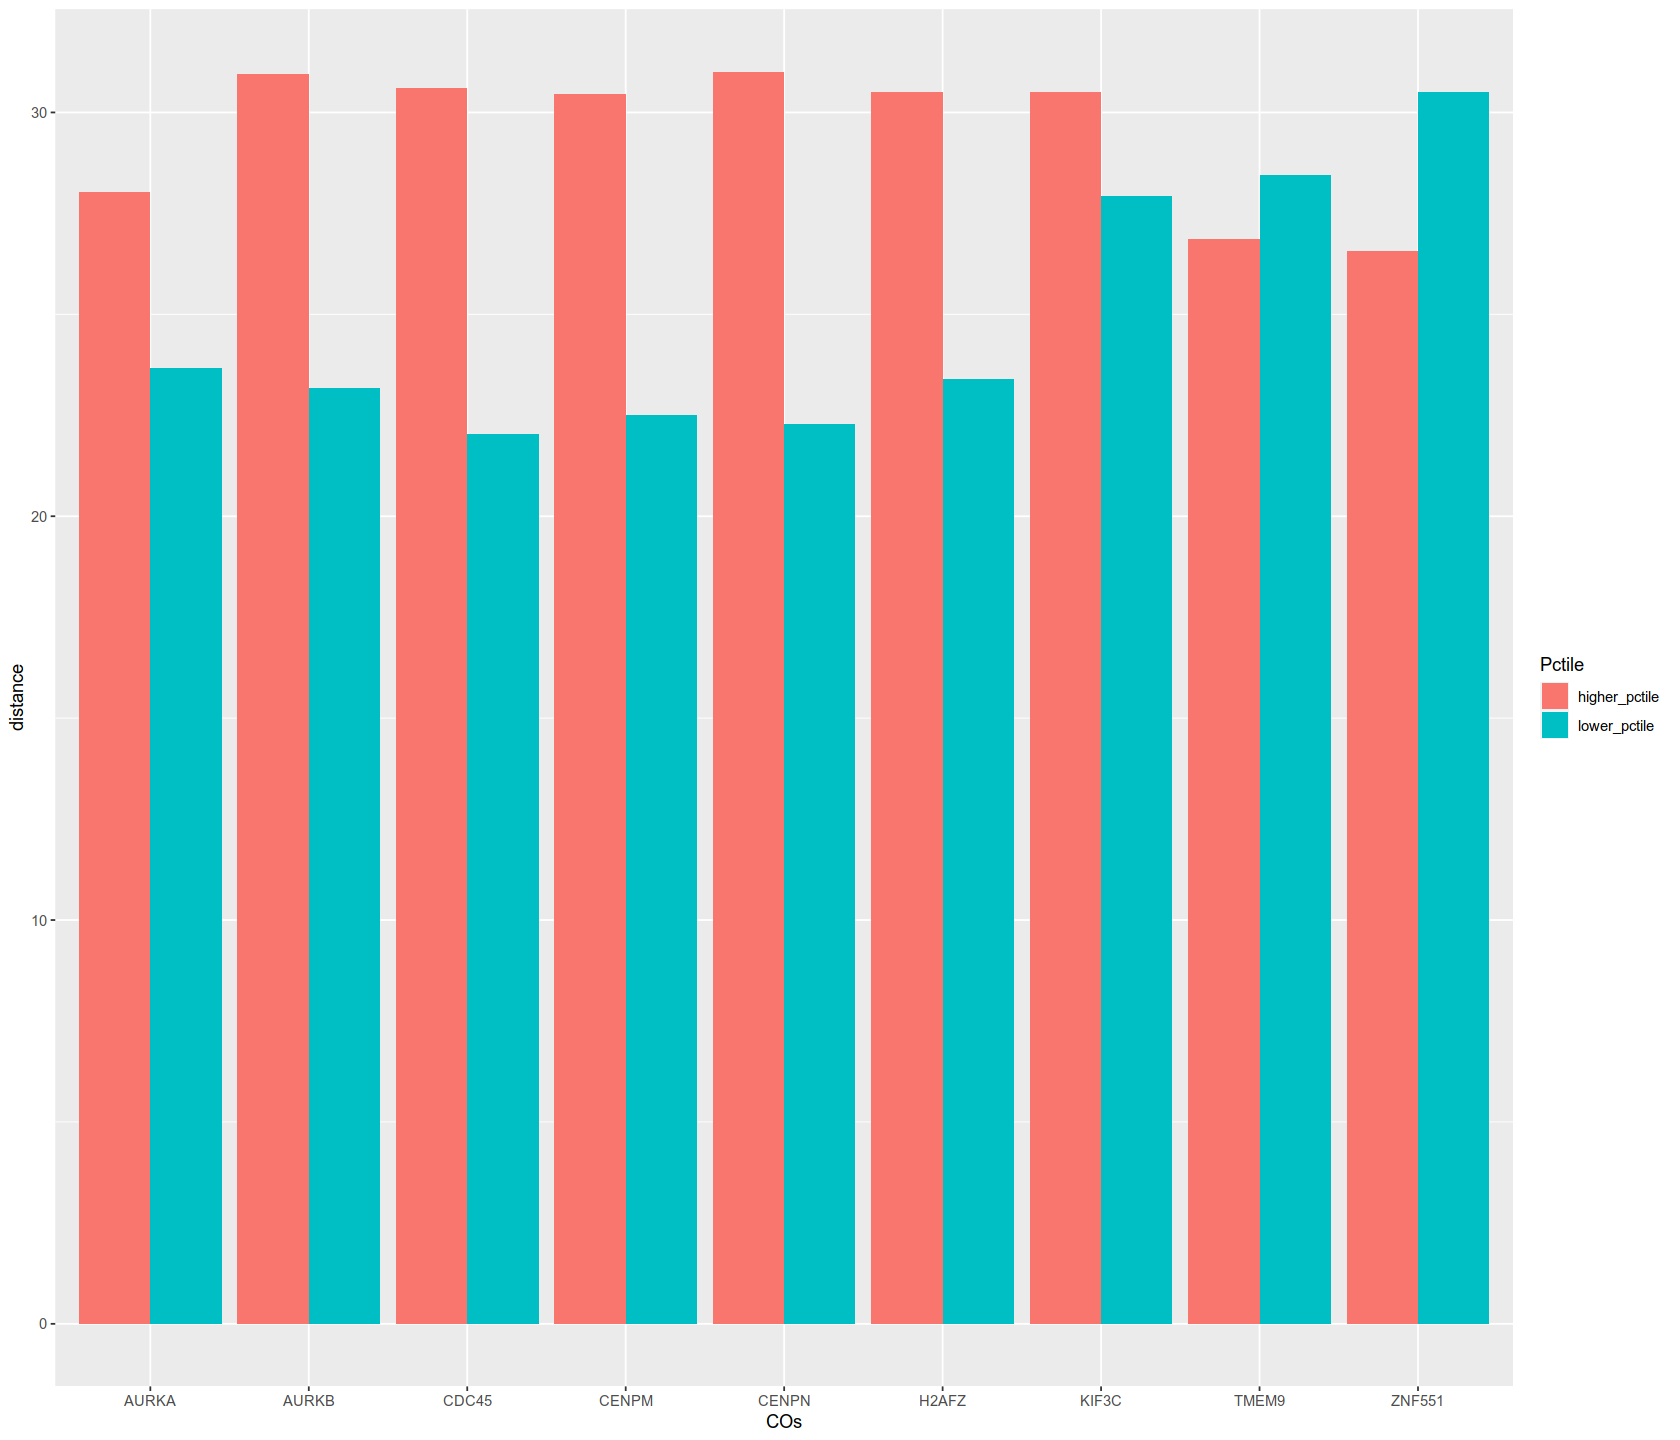

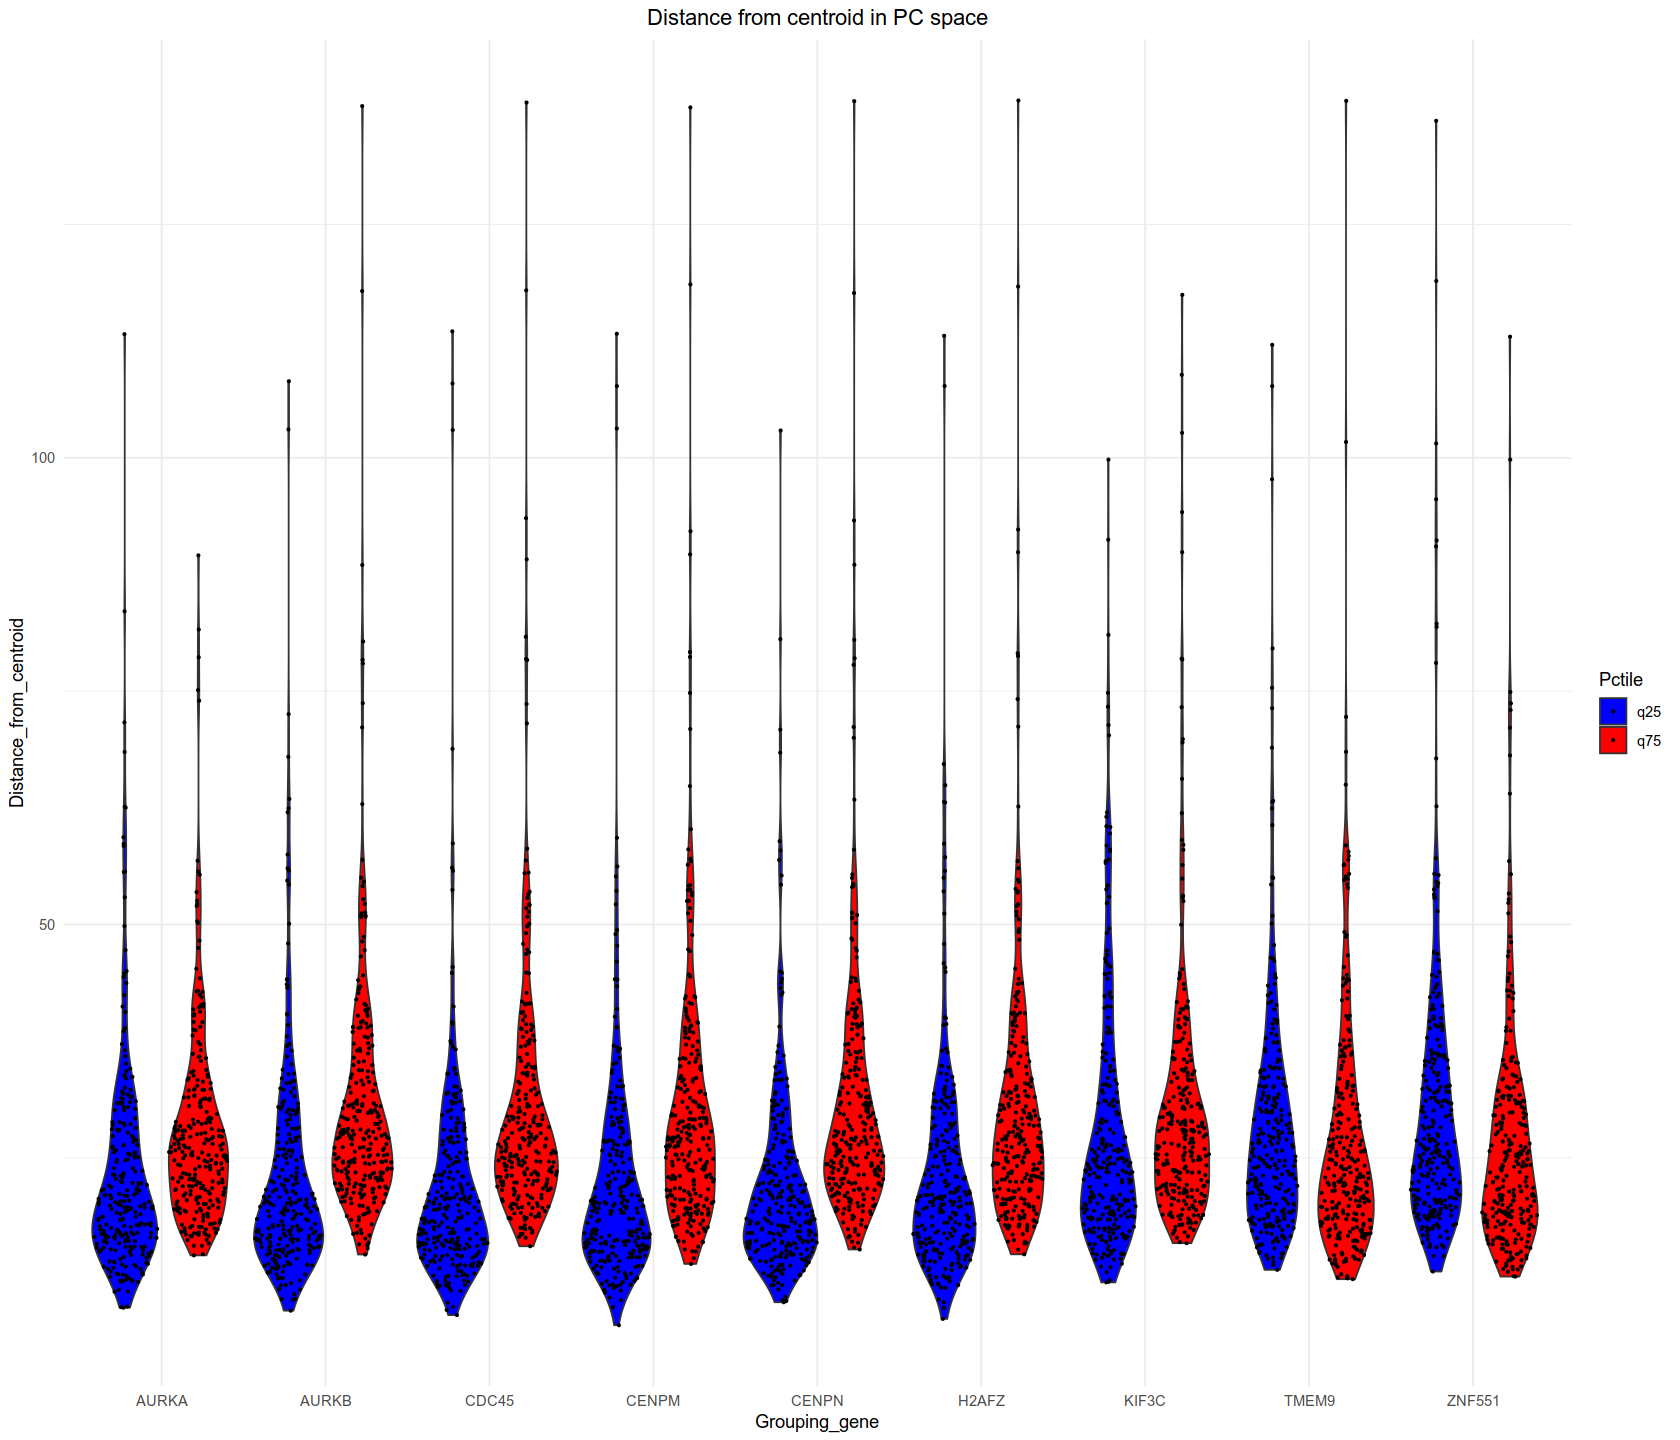

In [11]:
### show barplot plot of distances for 6 genes + all Brian's hits

master_list[[6]][genes_to_graph,] -> PC_distances_select

PC_distances_select <- pivot_longer(PC_distances_select, names_to = 'Pctile', values_to = 'distance', cols = ends_with('pctile'))

ggplot(PC_distances_select, aes(COs, distance, fill = Pctile)) +
  geom_bar(stat="identity", position=position_dodge())


### show sina plot of distances for 6 genes + all Brian's hits
## later on recalculate the distance metric using say the top 5 PCs or so to get
## better separation in this sina plot
distances_final_q25_q75_PCA[genes_to_graph] -> selected_gene_distances
lowers_select <- lapply(selected_gene_distances, '[[', 1)
uppers_select <- lapply(selected_gene_distances, '[[', 2)
lapply(genes_to_graph, rep, length(lowers_select[[1]])) -> tmp
grps <- unlist(tmp)
PCA_q25_q75_sina_df <- data.frame(Grouping_gene = grps, Pctile = c(rep('q25', length(unlist(lowers_select))), rep('q75', length(unlist(uppers_select)))), Distance_from_centroid = c(unlist(lowers_select), unlist(uppers_select)))


i <- ggplot(PCA_q25_q75_sina_df, aes(Grouping_gene, Distance_from_centroid, fill = Pctile)) +
  geom_violin(position=position_dodge()) +
  geom_sina(position=position_dodge(), size = 0.5) + scale_fill_manual(values = c('blue', 'red')) +
  ggtitle('Distance from centroid in PC space') + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
i

In [12]:
tests <- list()
genes <- unique(PCA_q25_q75_sina_df$Grouping_gene)
for (i in 1:length(genes)){
    tests[[i]] <- t.test(x = filter(PCA_q25_q75_sina_df, Grouping_gene == genes[i] & Pctile == 'q25')$Distance_from_centroid, 
           y = filter(PCA_q25_q75_sina_df, Grouping_gene == genes[i] & Pctile == 'q75')$Distance_from_centroid)
}


In [13]:
genes

[1] AURKA  AURKB  CDC45  CENPM  CENPN  H2AFZ  ZNF551 KIF3C  TMEM9 
Levels: AURKA AURKB CDC45 CENPM CENPN H2AFZ KIF3C TMEM9 ZNF551

In [14]:
p.vals.pc = lapply(tests, function(x) x$p.value)
p.adjust(p.vals.pc, method = 'bonferroni')

[1] 1.764396e-04 4.686929e-10 1.397413e-11 8.142562e-10 4.411695e-13
[6] 2.955916e-08 1.745711e-02 3.333970e-01 1.000000e+00

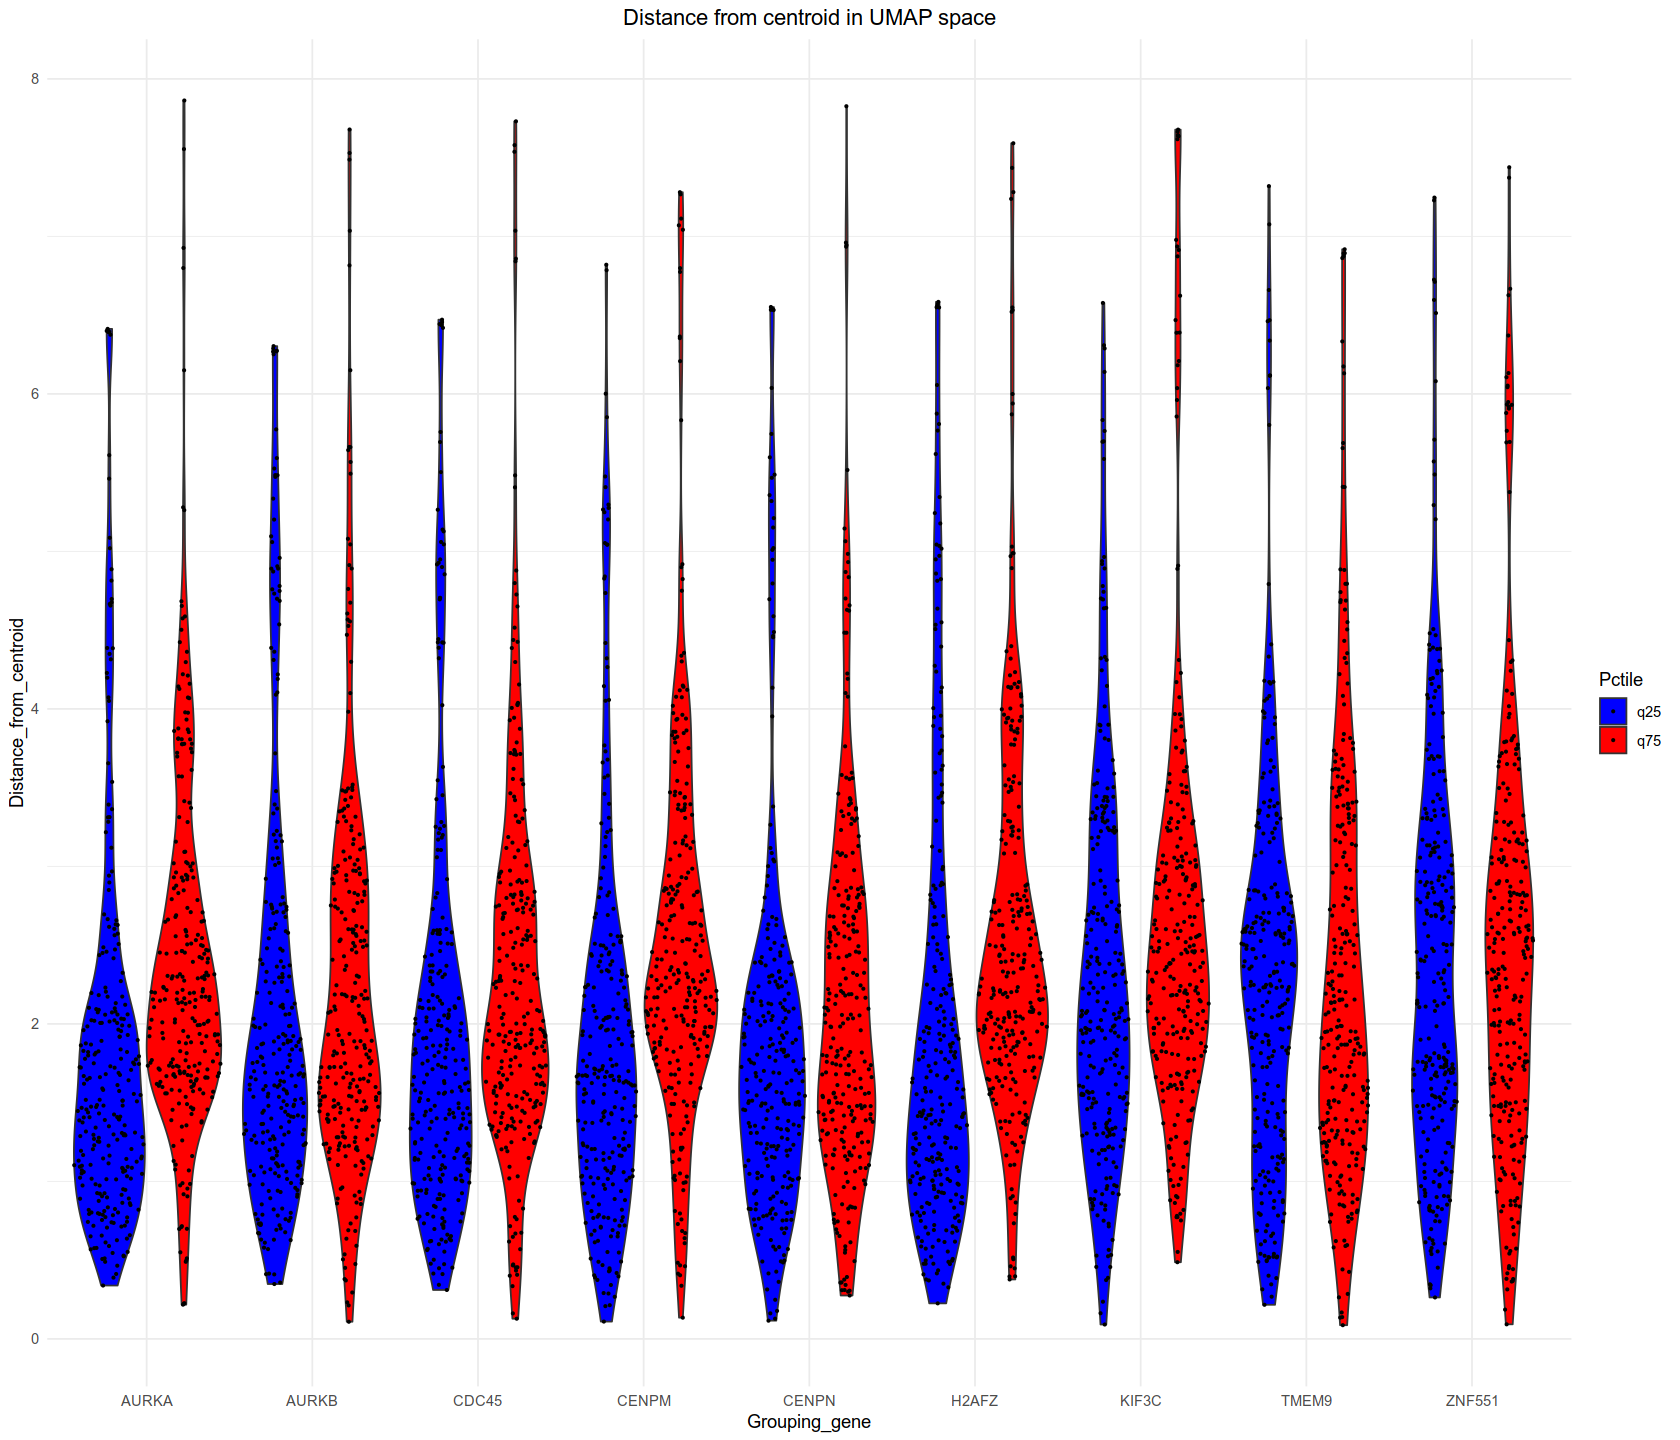

In [20]:
options(repr.plot.width=14, repr.plot.height=12)
### show sina plot of distances for 6 genes + all Brian's hits
## later on recalculate the distance metric using say the top 5 PCs or so to get
## better separation in this sina plot
distances_final_q25_q75_UMAP[genes_to_graph] -> selected_gene_distances
lowers_select <- lapply(selected_gene_distances, '[[', 1)
uppers_select <- lapply(selected_gene_distances, '[[', 2)
lapply(genes_to_graph, rep, length(lowers_select[[1]])) -> tmp
grps <- unlist(tmp)
UMAP_q25_q75_sina_df <- data.frame(Grouping_gene = grps, Pctile = c(rep('q25', length(unlist(lowers_select))), rep('q75', length(unlist(uppers_select)))), Distance_from_centroid = c(unlist(lowers_select), unlist(uppers_select)))


j <- ggplot(UMAP_q25_q75_sina_df, aes(Grouping_gene, Distance_from_centroid, fill = Pctile)) +
  geom_violin(position=position_dodge()) +
  geom_sina(position=position_dodge(), size = 0.5) + scale_fill_manual(values = c('blue', 'red')) +
  ggtitle('Distance from centroid in UMAP space') + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

j

In [21]:
tests2 <- list()
genes <- unique(UMAP_q25_q75_sina_df$Grouping_gene)
for (i in 1:length(genes)){
    tests2[[i]] <- t.test(x = filter(UMAP_q25_q75_sina_df, Grouping_gene == genes[i] & Pctile == 'q25')$Distance_from_centroid, 
           y = filter(UMAP_q25_q75_sina_df, Grouping_gene == genes[i] & Pctile == 'q75')$Distance_from_centroid, alternative = 'two.sided')
}


In [22]:
genes

[1] AURKA  AURKB  CDC45  CENPM  CENPN  H2AFZ  ZNF551 KIF3C  TMEM9 
Levels: AURKA AURKB CDC45 CENPM CENPN H2AFZ KIF3C TMEM9 ZNF551

In [23]:
p.vals.umap = lapply(tests2, function(x) x$p.value)
p.adjust(p.vals.umap, method = 'bonferroni')

[1] 1.097124e-06 1.000000e+00 3.555367e-02 1.142347e-07 1.175674e-01
[6] 6.405111e-06 1.000000e+00 1.556864e-02 1.000000e+00

In [24]:
i2 <- ggplot(PCA_q25_q75_sina_df, aes(Grouping_gene, Distance_from_centroid, fill = Pctile)) +
  geom_violin(position=position_dodge()) +
  geom_sina(position=position_dodge(), size = 0.5) + scale_fill_viridis_d(begin = 0, end = 0.9, option = 'D') +
  ggtitle('Distance from centroid in PC space') + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))


In [25]:
j2 <- ggplot(UMAP_q25_q75_sina_df, aes(Grouping_gene, Distance_from_centroid, fill = Pctile)) +
  geom_violin(position=position_dodge()) +
  geom_sina(position=position_dodge(), size = 0.5) + scale_fill_viridis_d(begin = 0, end = 0.9, option = 'D') +
  ggtitle('Distance from centroid in UMAP space') + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))


In [29]:
pdf('/home/ssobti/projects/heterogeneity_brian/output_data/distance_analysis_graphs/PC_UMAP_violin.pdf', width = 12, height = 9)
print(i)
print(j)
dev.off()

[1] 9


png 
  2

In [28]:
pdf('/home/ssobti/projects/heterogeneity_brian/output_data/distance_analysis_graphs/PC_UMAP_violin2.pdf', width = 12, height = 9)
print(i2)
print(j2)
dev.off()

png 
  2

In [22]:
control_genes = c('KIF3C', 'TMEM9', 'ZNF551')
non_control_genes = setdiff(genes_to_graph, control_genes)
PCA_q25_q75_sina_df$status = 'none'
PCA_q25_q75_sina_df$status[PCA_q25_q75_sina_df$Grouping_gene %in% control_genes] = 'control'
PCA_q25_q75_sina_df$status[PCA_q25_q75_sina_df$Grouping_gene %in% non_control_genes] = 'non-control'

In [33]:

tests3 <- list()

for (i in 1:length(non_control_genes)){
    tests3[[i]] <- t.test(x = filter(PCA_q25_q75_sina_df, Grouping_gene == non_control_genes[i] & Pctile == 'q25')$Distance_from_centroid, 
           y = filter(PCA_q25_q75_sina_df, Grouping_gene == control_genes[3] & Pctile == 'q25')$Distance_from_centroid, alternative = 'less')
}


In [27]:
non_control_genes

[1] "AURKA" "AURKB" "CDC45" "CENPM" "CENPN" "H2AFZ"

In [34]:
p.vals.pc = lapply(tests3, function(x) x$p.value)
p.adjust(p.vals.pc, method = 'bonferroni')

[1] 1.782674e-07 2.558373e-08 9.168034e-11 1.091088e-09 5.817629e-11
[6] 6.144059e-08